In [1]:
import kit
from kit import penguin_color
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)
import palmerpenguins
pg = palmerpenguins.load_penguins().dropna()

In [11]:
pg = pg.astype({i: 'category' for i in pg.describe(include='object').columns})

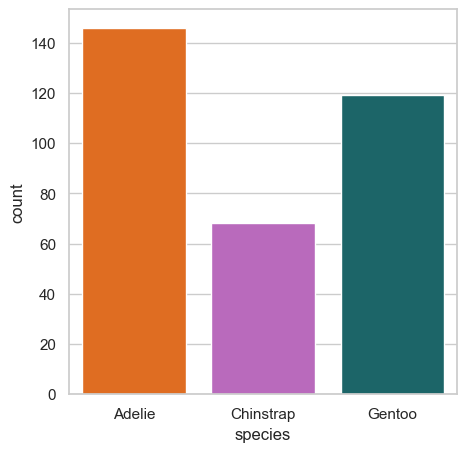

,species,count
0,Adelie,146
1,Gentoo,119
2,Chinstrap,68


In [24]:
plt.figure(figsize=(5, 5))

(
    pg['species']
    .value_counts()
    .reset_index()
    .pipe(
        lambda df: (
            sns.barplot(
                data= df,
                x= 'species',
                y = 'count',
                hue= 'species',
                palette= penguin_color
            )
        )
    )
)

plt.show()
pg['species'].value_counts().reset_index()

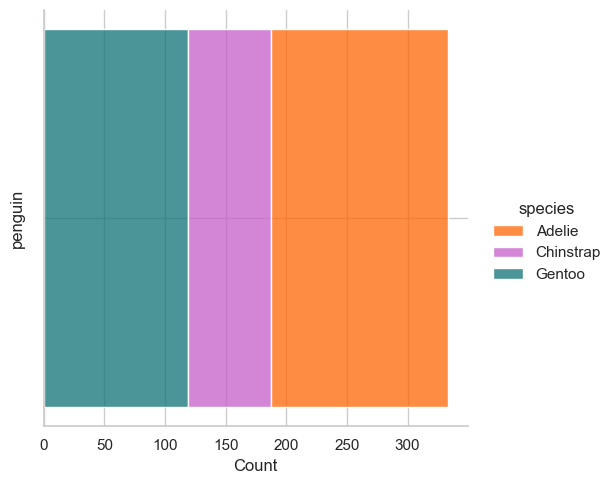

In [36]:
(
    pg
    .assign(
        penguin= ''
    )
    .pipe(
        lambda df: (
            sns.displot(
                data= df,
                y= 'penguin',
                # x= 'penguin',
                multiple= 'stack',
                hue= 'species',
                palette= penguin_color
            )
        )
    )
)

In [57]:
(
    pg['species']
    .value_counts()
    .reset_index()
    .pipe(
        lambda df: (
            df
            .assign(
                proportion= df['count'] / len(pg)
            )
        )
    )
    [['species', 'proportion']]
)

,species,proportion
0,Adelie,0.438438
1,Gentoo,0.357357
2,Chinstrap,0.204204


## Previous

In [14]:
cols = [i for i in pg.describe(include='category').columns]

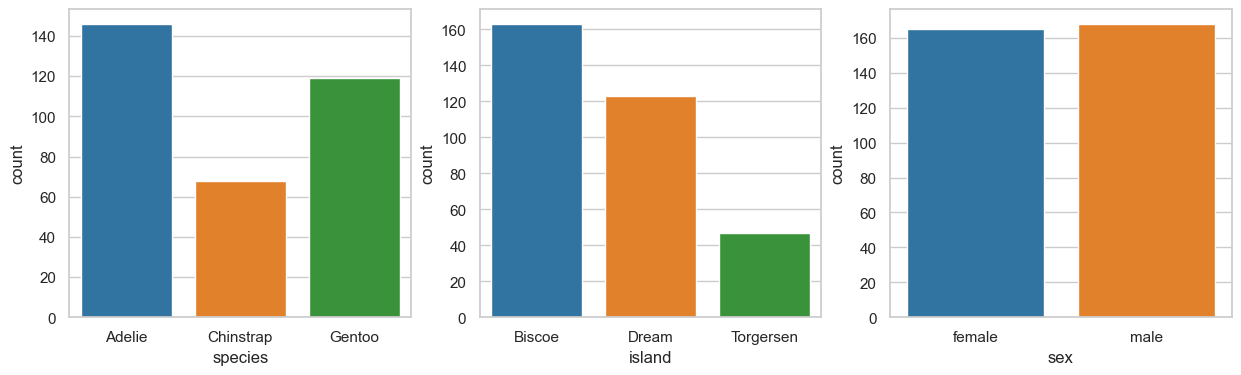

In [19]:
fix, ax = plt.subplots(1, 3, figsize=(15, 4))
for i in range(len(cols)):
    (
        pg
        .value_counts(
            cols[i],
            sort= True
        )
        .reset_index()
        .pipe(
            lambda df: (
                sns.barplot(
                    ax=ax[i],
                    data= df,
                    x= cols[i],
                    y= 'count',
                    # palette= penguin_color,
                    hue= cols[i]
                )
            )
        )
    )

<Axes: xlabel='species', ylabel='count'>

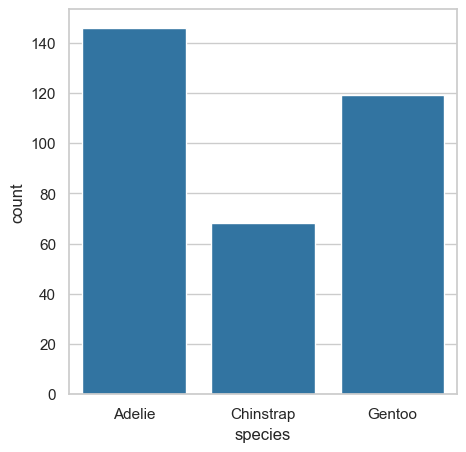

In [89]:
plt.figure(figsize=(5,5))

(
    pg
    .value_counts(
        'species',
        sort=True
    )
    .reset_index()
    .pipe(
        lambda df: (
            sns.barplot(
                data= df,
                x= 'species',
                y= 'count'
            )
        )
    )
)

In [20]:
color_hex = ['#ff6602ff','#0f7175ff','#c65dc9ff']

In [26]:
pg.species.value_counts().reset_index()['species'].to_list()

['Adelie', 'Gentoo', 'Chinstrap']

{'male': '#ff6602ff', 'female': '#0f7175ff'}

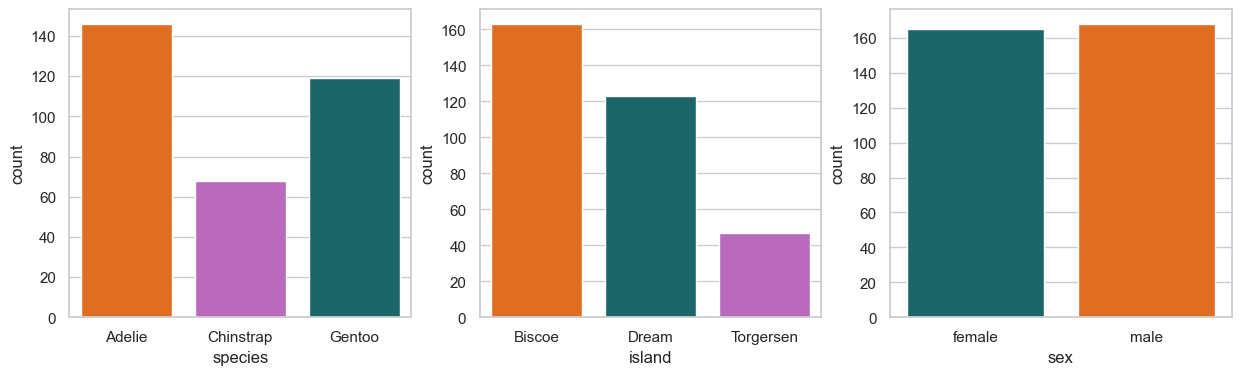

In [61]:
color_hex = ['#ff6602ff','#0f7175ff','#c65dc9ff']
cols = pg.describe(include='category').columns.to_list()
colors = []

for i in cols:
    colors.append({i: j for i, j in zip(pg[i].value_counts().reset_index()[i].to_list(), color_hex)})

fix, ax = plt.subplots(1, 3, figsize=(15, 4))
for i in range(len(cols)):
    (
        pg
        .value_counts(cols[i])
        .reset_index()
        .pipe(
            lambda df: (
                sns.barplot(
                    ax= ax[i],
                    data= df,
                    x= cols[i],
                    y= 'count',
                    palette= colors[i],
                    hue=cols[i]
                )
            )
        )
    )

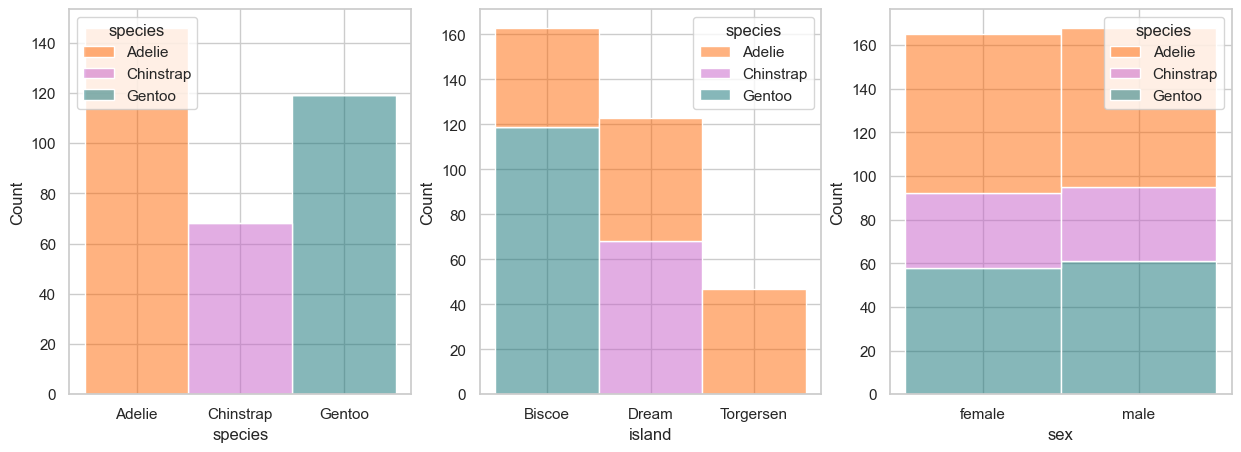

In [64]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(cols)):
    (
        sns.histplot(
            ax= ax[i],
            data= pg,
            x= cols[i],
            hue= 'species',
            multiple= 'stack',
            palette= penguin_color,
            alpha=0.5
        )
    )

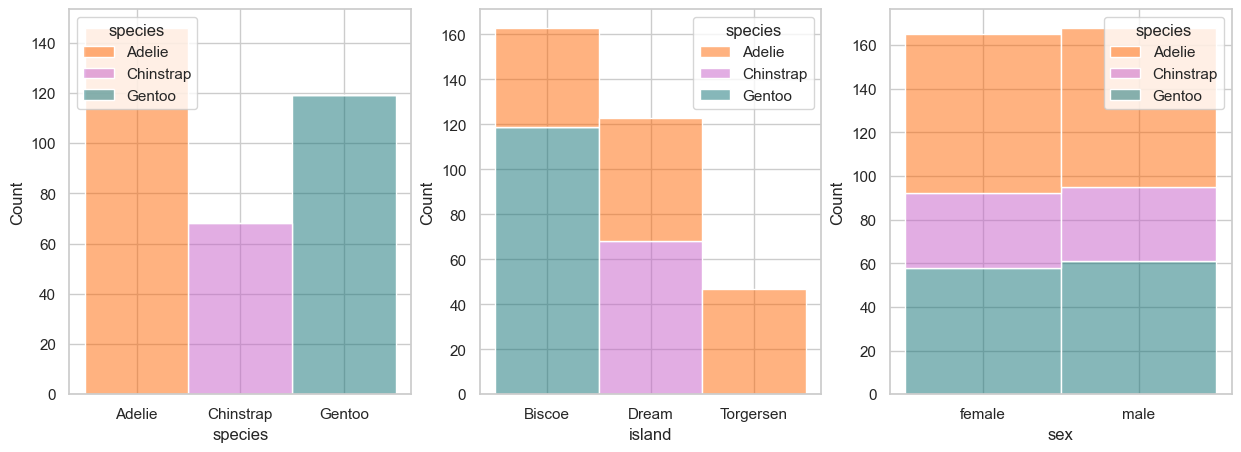

In [88]:
fig, ax = plt.subplots(1, len(pg.describe(include='category').columns), figsize=(15, 5))
cols = pg.describe(include='category').columns
for i in range(len(cols)):
    sns.histplot(
        ax = ax[i],
        data= pg,
        x= cols[i],
        hue= 'species',
        palette= penguin_color,
        multiple='stack',
        alpha= 0.5
    )